**Author:** Regina Hoo

**Institution:** Wellcome Sanger institute

**April, 2023**

---

## Plot ET and LT figure 5D and 5E

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata

sc.set_figure_params(figsize=(4, 4))

In [2]:
adata = sc.read ('./output/rna4_annotate_ET.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 142251 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden_harmony', 'id_colors', 'idc_colors', 'idc_new_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'sample.2_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'uma

In [4]:
#keep good quality cells
sc.pp.filter_cells(adata, min_genes=400)
# remove lowly expressed genes
sc.pp.filter_genes(adata, min_counts=3)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
adata

AnnData object with n_obs × n_vars = 138618 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts'
    uns: 'dendrogram_leiden_harmony', 'id_colors', 'idc_colors', 'idc_new_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'sample.2_colors', 'stage_0_colors', 'stage_1_colors', 'stage_c

In [6]:
adata.obs['sample.1'].values.describe()

,counts,freqs
categories,,
Pla_HDBR11345021,9421,0.067964
Pla_HDBR11345022,14004,0.101026
Pla_HDBR11345023,4740,0.034195
Pla_HDBR11345024,3835,0.027666
Pla_HDBR11345025,29661,0.213977
Pla_HDBR11345026,10111,0.072941
Pla_HDBR13007971,26857,0.193748
Pla_HDBR13007972,27449,0.198019
Pla_HDBR13007973,12540,0.090464


In [7]:
adata.obs['stage_1'].values.describe()
#data already log normalised

,counts,freqs
categories,,
pf_b,27391,0.197601
pf_iv,40113,0.289378
pf_nb,71114,0.513021


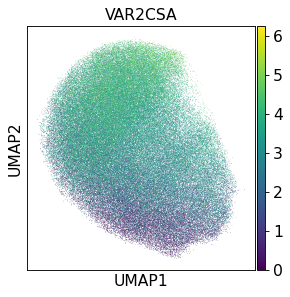

In [8]:
#check
sc.pl.umap(adata, color=['VAR2CSA' ],legend_fontsize='xx-small', use_raw=False)

## Figure 5D

In [9]:
#new_markers--remove metab!  
marker_genes= {
    'Adhesins ': { 'EMP3-1', 'KAHRP','SURF8.2', 'Pf332'},
    'PHIST family': { 'PF3D7_1476200', 'PF3D7_0424000', 'PF3D7_1201000','PF3D7_0801000','PF3D7_0831500'},
    'Trafficking': { 'FIKK10.2', 'FIKK4.2', 'FIKK9.3','PTP3','PTP4', 'PTP6', 'EXP2','PTEX150', 'PTEX88', 'HSP101'},
    'Transport': { 'EXP1', 'ETRAMP5', 'ABCI3', }
}

In [1]:
#order categories
order_cat1=['pf_iv', 'pf_nb', 'pf_b']

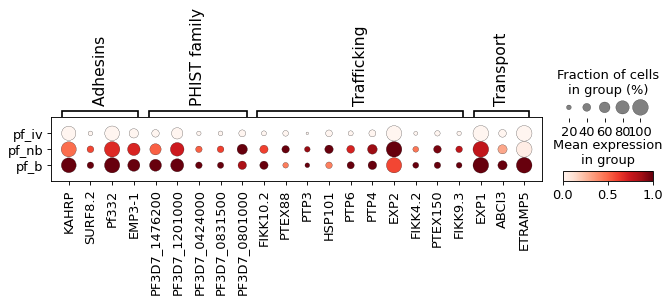

In [21]:
# Lognormalize for dotplots
#adata.obs['cells'].cat.reorder_categories(adata.obs['cells'].cat.categories[::-1], inplace=True)
sc.pl.dotplot(adata, marker_genes, groupby='stage_1', 
              use_raw=False, standard_scale='var',
              categories_order=order_cat1,save='_new_ET_400.pdf')

In [12]:
adataLT = sc.read ('./output/rna4_annotate_LT.h5ad')

In [13]:
adataLT

AnnData object with n_obs × n_vars = 26447 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden_harmony', 'id_colors', 'idc_colors', 'idc_new_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'sample.2_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'umap

In [14]:
#keep good quality cells
sc.pp.filter_cells(adataLT, min_genes=400)
# remove lowly expressed genes
sc.pp.filter_genes(adataLT, min_counts=3)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [15]:
adataLT

AnnData object with n_obs × n_vars = 26302 × 5435
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts'
    uns: 'dendrogram_leiden_harmony', 'id_colors', 'idc_colors', 'idc_new_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'sample.2_colors', 'stage_0_colors', 'stage_1_colors', 'stage_co

In [16]:
adataLT.obs['sample.1'].values.describe()

,counts,freqs
categories,,
Pla_HDBR11345021,6908,0.262642
Pla_HDBR11345022,4992,0.189795
Pla_HDBR11345023,1476,0.056117
Pla_HDBR11345024,4340,0.165006
Pla_HDBR11345025,3429,0.130370
Pla_HDBR11345026,267,0.010151
Pla_HDBR13007971,1936,0.073607
Pla_HDBR13007972,2342,0.089043
Pla_HDBR13007973,612,0.023268


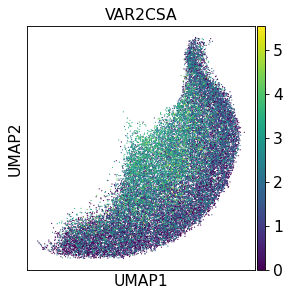

In [17]:
#check log normalised ok
sc.pl.umap(adataLT, color=['VAR2CSA' ],legend_fontsize='xx-small', use_raw=False)

In [18]:
adataLT.obs['stage_1'].values.describe()

,counts,freqs
categories,,
pf_b,2355,0.089537
pf_iv,13184,0.501255
pf_nb,10763,0.409208


## Figure 5E

In [19]:
#order categories
order_cat1=['pf_iv', 'pf_nb', 'pf_b']

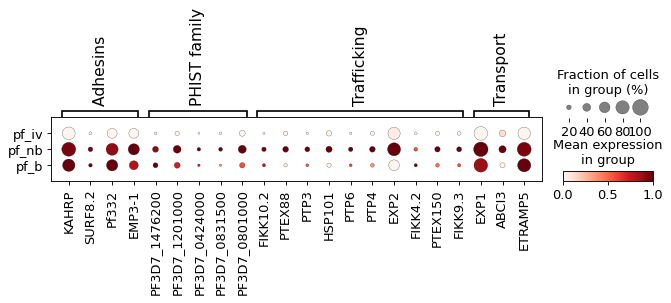

In [22]:
# Lognormalize for dotplots
#adata.obs['cells'].cat.reorder_categories(adata.obs['cells'].cat.categories[::-1], inplace=True)
sc.pl.dotplot(adataLT, marker_genes, groupby='stage_1', 
              use_raw=False,  standard_scale='var',dot_max=1 ,
              categories_order= order_cat1,save='_new_LT_400.pdf' )